#### Research Notes
+ Required orientation: 0, 45, 90, 135, 180, 225, 270, 315
- MENOW Homepahe: https://chenyanwu.github.io/MEBOW/

#### Import Necessary Libraries

In [1]:
import os
import json
import re
import shutil

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Required 8 orientation that helps in determining the pedestrain body position for croad rossing
required_orientation = [0, 45, 90, 135, 180, 225, 270, 315]

In [3]:
annotation_train_fp = "dataset/train_hoe.json"
annotation_val_fp = "dataset/val_hoe.json"

#### COCO Annotation Extraction

MEBOW paper takes COCO 2017 dataset and annotated the person in the image for various body orientation. Since, COCO has multiple objects other than that person, this following codes helps in dataset preparation

In [4]:
coco_annotation_train_fp = "dataset/coco2017_annotations/instances_train2017.json"
coco_annotation_val_fp = "dataset/coco2017_annotations/instances_val2017.json"

In [5]:
with open(coco_annotation_train_fp) as json_file:
    annotation_coco_train = json.load(json_file)

In [6]:
with open(coco_annotation_val_fp) as json_file:
    annotation_coco_val = json.load(json_file)

In [7]:
# ID -> 1 means person in the COCO dataset
bbox_train = {ann['id']: {"bbox": ann['bbox'], "image_id": ann['image_id']}
              for ann in annotation_coco_train['annotations'] if  ann["category_id"]==1}

bbox_val = {ann['id']: {"bbox": ann['bbox'], "image_id": ann['image_id']}
              for ann in annotation_coco_val['annotations'] if  ann["category_id"]==1}

#### Training Set

In [8]:
# Load Training dataset
with open(annotation_train_fp) as json_file:
    annotation_train = json.load(json_file)

In [9]:
# Check for unique orientation
unique_orientation = set(annotation_train.values())
print(f"Unique Orientation: {unique_orientation}")

Unique Orientation: {0.0, 130.0, 260.0, 5.0, 135.0, 265.0, 10.0, 140.0, 270.0, 15.0, 145.0, 275.0, 20.0, 150.0, 280.0, 25.0, 155.0, 285.0, 30.0, 160.0, 290.0, 35.0, 165.0, 295.0, 40.0, 170.0, 300.0, 45.0, 175.0, 305.0, 50.0, 180.0, 310.0, 55.0, 185.0, 315.0, 60.0, 190.0, 320.0, 65.0, 195.0, 325.0, 70.0, 200.0, 330.0, 75.0, 205.0, 335.0, 80.0, 210.0, 340.0, 85.0, 215.0, 345.0, 90.0, 220.0, 350.0, 95.0, 225.0, 355.0, 100.0, 230.0, 105.0, 235.0, 110.0, 240.0, 115.0, 245.0, 120.0, 250.0, 125.0, 255.0}


In [10]:
# Count annotation for each unique orientation
annotation_count = {}
for orientation in unique_orientation:
    tmp_counter = 0
    for key, val in annotation_train.items():
        if val == orientation:
            tmp_counter += 1
            
    annotation_count[int(orientation)] = tmp_counter

In [11]:
annotation_count_df = pd.DataFrame(annotation_count.items(), columns=["orientation", "count"])
annotation_count_df.head()

,orientation,count
0,0,1033
1,130,1256
2,260,1216
3,5,1332
4,135,1946


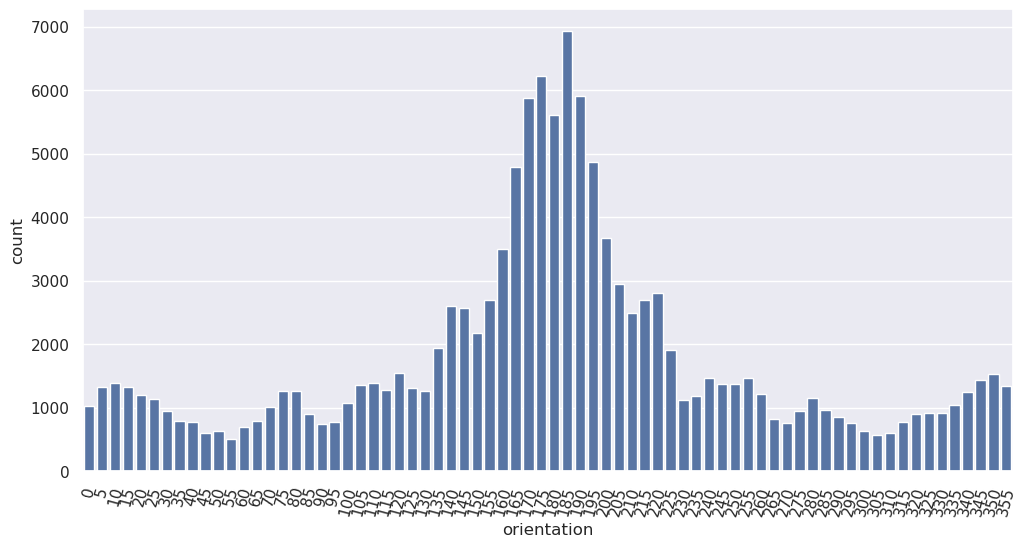

In [12]:
# Plot the figure
plt.figure(figsize=(12, 6))
ax = sns.barplot(annotation_count_df, x="orientation", y="count")
ax.tick_params(axis="x", rotation=75)
ax.set(xlabel="orientation", ylabel="count")
plt.show()

In [13]:
annotation_count_df.describe()

,orientation,count
count,72.000000,72.000000
mean,177.500000,1775.611111
std,104.642248,1494.136225
min,0.000000,501.000000
25%,88.750000,903.750000
50%,177.500000,1257.000000
75%,266.250000,1916.000000
max,355.000000,6928.000000


In [14]:
# Extract all the count for required 8 orientation
annotation_count_df[annotation_count_df["orientation"].isin(required_orientation)]

,orientation,count
0,0,1033
4,135,1946
8,270,763
27,45,605
31,180,5603
35,315,778
54,90,735
58,225,1906


#### Validation Set

In [15]:
# Load Training dataset
with open(annotation_val_fp) as json_file:
    annotation_val = json.load(json_file)

In [16]:
# Check for unique orientation
unique_orientation_val = set(annotation_val.values())
print(f"Validation Unique Orientation: {unique_orientation}")

Validation Unique Orientation: {0.0, 130.0, 260.0, 5.0, 135.0, 265.0, 10.0, 140.0, 270.0, 15.0, 145.0, 275.0, 20.0, 150.0, 280.0, 25.0, 155.0, 285.0, 30.0, 160.0, 290.0, 35.0, 165.0, 295.0, 40.0, 170.0, 300.0, 45.0, 175.0, 305.0, 50.0, 180.0, 310.0, 55.0, 185.0, 315.0, 60.0, 190.0, 320.0, 65.0, 195.0, 325.0, 70.0, 200.0, 330.0, 75.0, 205.0, 335.0, 80.0, 210.0, 340.0, 85.0, 215.0, 345.0, 90.0, 220.0, 350.0, 95.0, 225.0, 355.0, 100.0, 230.0, 105.0, 235.0, 110.0, 240.0, 115.0, 245.0, 120.0, 250.0, 125.0, 255.0}


In [17]:
# Count annotation for each unique orientation
annotation_count_val = {}
for orientation in unique_orientation_val:
    tmp_counter = 0
    for key, val in annotation_val.items():
        if val == orientation:
            tmp_counter += 1
            
    annotation_count_val[int(orientation)] = tmp_counter

In [18]:
annotation_count_val_df = pd.DataFrame(annotation_count_val.items(), columns=["orientation", "count"])
annotation_count_val_df.head()

,orientation,count
0,0,42
1,130,52
2,260,58
3,5,48
4,135,66


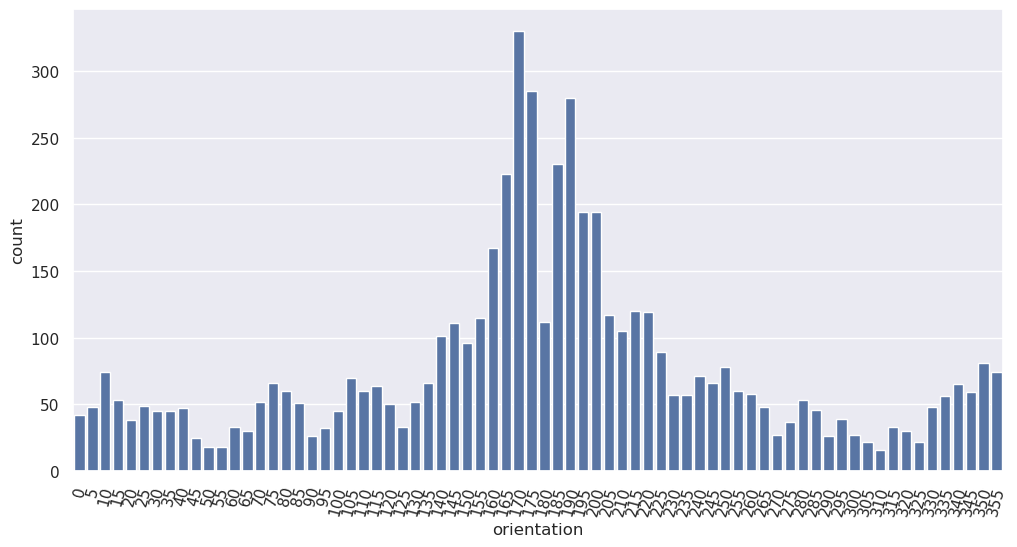

In [19]:
# Plot the figure
plt.figure(figsize=(12, 6))
ax = sns.barplot(annotation_count_val_df, x="orientation", y="count")
ax.tick_params(axis="x", rotation=75)
ax.set(xlabel="orientation", ylabel="count")
plt.show()

In [20]:
annotation_count_val_df.describe()

,orientation,count
count,72.000000,72.000000
mean,177.500000,76.888889
std,104.642248,65.316468
min,0.000000,16.000000
25%,88.750000,38.750000
50%,177.500000,56.500000
75%,266.250000,83.000000
max,355.000000,330.000000


In [21]:
# Extract all the count for required 8 orientation
annotation_count_val_df[annotation_count_val_df["orientation"].isin(required_orientation)]

,orientation,count
0,0,42
4,135,66
8,270,27
27,45,25
31,180,112
35,315,33
54,90,26
58,225,89


#### Dataset Preparation

Following Codes takes the training and validation COCO dataset. At same time, it takes annotation from the MEBOW authors. Combining both of those mappings, dataset is created

In [22]:
train_fname_ls = [fname for fname in os.listdir("./dataset/train2017/")]
val_fname_ls = [fname for fname in os.listdir("./dataset/val2017/")]

In [23]:
def annotation_mapping(fname_ls, annotations, coco_annotations):
    fname_ls = sorted(fname_ls)
    annotations = dict(sorted(annotations.items(), key=lambda x: x[0]))
    
    counter = 0
    annotation_mapping = {}

    for key, val in annotations.items():
        if val in required_orientation:
            image_id = key.split("_")[0]
            instance_id = int(key.split("_")[1])
            
            for fname in fname_ls:
                # match_id = re.search(rf"{image_id}\.", fname) #TODO: Use only when full file name is available
                match_id = re.search(rf"{image_id}", fname)

                if match_id:
                    if fname not in annotation_mapping.keys():
                        tmp_coco = coco_annotations[instance_id]

                        annotation_mapping[fname] = [{"instance_id": instance_id, "bbox": tmp_coco["bbox"], "label": val}]
                    else:
                        tmp_coco = coco_annotations[instance_id]

                        annotation_mapping[fname].append({"instance_id": instance_id, "bbox": tmp_coco["bbox"], "label": val})
                        
                    break
                    
            counter+=1
                
    return annotation_mapping

In [ ]:
train_mapping = annotation_mapping(train_fname_ls, annotation_train, bbox_train)
val_mapping = annotation_mapping(val_fname_ls, annotation_val, bbox_val)

In [ ]:
new_train_fp = "dataset/coco2017_8orienation_train_new"
new_val_fp = "dataset/coco2017_8orientation_val_new"

In [ ]:
def create_dataset(mapping_file, dataset_dir, new_dataset_dir):
    if os.path.exists(new_dataset_dir):
        for key, val in mapping_file.items():
            shutil.copy(os.path.join(dataset_dir, key), new_dataset_dir)
            
    else:
        os.makedirs(new_dataset_dir)
        for key, val in mapping_file.items():
            shutil.copy(os.path.join(dataset_dir, key), new_dataset_dir)

In [ ]:
create_dataset(train_mapping, "./dataset/train2017/", new_train_fp)

In [ ]:
create_dataset(val_mapping, "./dataset/val2017/", new_val_fp)

In [ ]:
# write train mapping dict to json file
with open("dataset/train_coco2017_annotation_new.json", "w") as json_file:
    json.dump(train_mapping, json_file)

In [ ]:
# write val mapping dict to json file
with open("dataset/val_coco2017_annotation_new.json", "w") as json_file:
    json.dump(val_mapping, json_file)

In [ ]:
# Zip newly extracted train dataset with 8 orientation
!zip -q -r dataset/coco2017_8orienation_train_new.zip dataset/coco2017_8orienation_train_new/ 

In [ ]:
!zip -q -r dataset/coco2017_8orienation_val_new.zip dataset/coco2017_8orientation_val_new/